# Exploring the Electron-Positron EOS

In [1]:
import pynucastro as pyna

In [2]:
es = pyna.eos.ElectronEOS()

In [3]:
import numpy as np

In [4]:
Ts = np.logspace(4, 9, 51)
rhos = np.logspace(-4, 9, 131)

In [5]:
rhos

array([1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
       2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
       6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
       1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
       3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
       1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
       2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
       6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
       1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.16227766e-01,
       3.98107171e-01, 5.01187234e-01, 6.30957344e-01, 7.94328235e-01,
       1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
       2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
       6.30957344e+00, 7.94328235e+00, 1.00000000e+01, 1.25892541e+01,
       1.58489319e+01, 1.99526231e+01, 2.51188643e+01, 3.16227766e+01,
      

In [6]:
eta = np.zeros((len(rhos), len(Ts)))
p_e = np.zeros((len(rhos), len(Ts)))
p_pos = np.zeros((len(rhos), len(Ts)))
n_e = np.zeros((len(rhos), len(Ts)))
n_pos = np.zeros((len(rhos), len(Ts)))

In [7]:
comp = pyna.Composition(["he4"])
comp.set_equal()

In [8]:
for ir, rho in enumerate(rhos):
    print(ir)
    for it, T in enumerate(Ts):
        state = es.pe_state(rho, T, comp)
        eta[ir, it] = state.eta
        p_e[ir, it] = state.p_e
        p_pos[ir, it] = state.p_pos
        n_e[ir, it] = state.n_e
        n_pos[ir, it] = state.n_pos        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130


In [9]:
import matplotlib.pyplot as plt
from matplotlib import colors

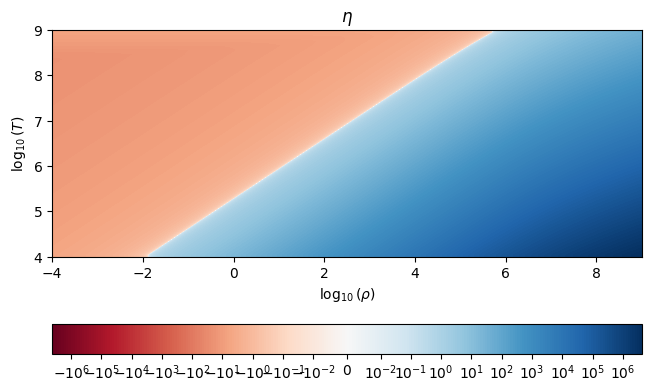

In [43]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
im = ax.imshow(eta.T, origin="lower",
               norm=colors.SymLogNorm(linthresh=0.01, vmin=-eta.max(), vmax=eta.max()),
               extent=[np.log10(rhos.min()), np.log10(rhos.max()),
                       np.log10(Ts.min()), np.log10(Ts.max())],
               interpolation="bilinear",
               cmap="RdBu")
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(T)$")
ax.set_title(r"$\eta$")
fig.colorbar(im, ax=ax, orientation="horizontal")

In [32]:
y = (n_pos / (n_pos + n_e))
y.min(), y.max()

(np.float64(0.0), np.float64(0.499999986135348))

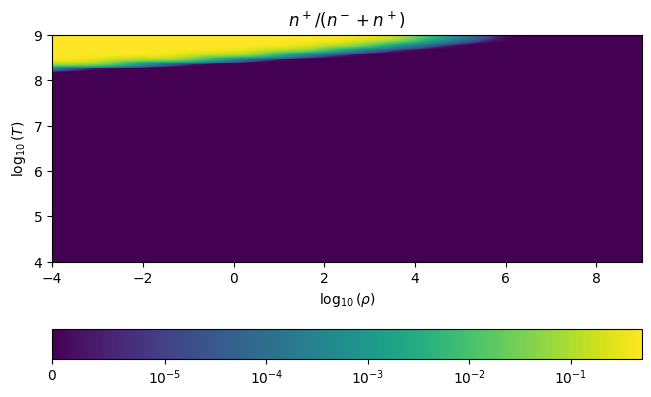

In [38]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
im = ax.imshow(y.T, origin="lower",
               norm=colors.SymLogNorm(linthresh=1.e-5, vmin=1.e-50, vmax=0.5, clip=True),
               extent=[np.log10(rhos.min()), np.log10(rhos.max()),
                       np.log10(Ts.min()), np.log10(Ts.max())],
               interpolation="bicubic")
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(T)$")
ax.set_title(r"$n^+ / (n^- + n^+)$")
fig.colorbar(im, ax=ax, orientation="horizontal")